In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
pd.set_option('display.max_columns', None, 'display.max_rows', None)

data = pd.read_csv('pems_sample.csv')
data.head()

Matplotlib is building the font cache; this may take a moment.


,Hour,1119850-ML,1108509-ML,1126614-ML,1108512-ML,1119659-ML,1122507-ML,1119865-ML,1125314-ML,1119871-ML,1122512-ML,1119879-ML,1108651-ML,1119890-ML,1108663-ML,1119903-ML,1108682-ML,1119921-ML,1108687-ML,1108659-ML,1119928-ML,1119934-ML,1119941-ML,1119947-ML,1115289-ML,1115304-ML,1115306-ML,1115314-ML,1115323-ML,1119960-ML,1119972-ML,1119984-ML,1119990-ML,1121692-ML,1121707-ML,1121715-ML,1121724-ML,1121731-ML,1121737-ML,1204198-ML,1204211-ML,1204230-ML,1204244-ML,1204255-ML,1210908-ML,1204268-ML,1204279-ML,1213215-ML,1221232-ML,1204301-ML,1204316-ML,1204328-ML,1204340-ML,1204372-ML,1204384-ML,1204395-ML,1204409-ML,1210926-ML,1220030-ML,1204422-ML,1210974-ML,1210991-ML,1204436-ML,1204447-ML,1204453-ML,1211107-ML,1222006-ML,1221985-ML,1204472-ML,1204486-ML,1222018-ML,1204501-ML,1222023-ML,1213570-ML,1204515-ML,1221811-ML,1204532-ML,1221803-ML,1213700-ML,1221835-ML,1204546-ML,1204559-ML,1221843-ML,1204571-ML,1204586-ML,1213527-ML,1204615-ML,1204632-ML,1204638-ML,1204672-ML,1204682-ML,1204697-ML,1204699-ML,1204703-ML,1204731-ML,1204750-ML,1204766-ML,1204787-ML,1204808-ML,1204825-ML,1220011-ML,1204861-ML,1204878-ML,1204924-ML,1204937-ML,1204950-ML,1204982-ML,1205012-ML,1205045-ML,1205071-ML,1205088-ML,1205135-ML,1205152-ML,1205157-ML,1205165-ML,1205168-ML,1205175-ML,1205193-ML,1205204-ML,1205215-ML,1205225-ML,1205262-ML,1205269-ML,1205290-ML,1205303-ML,1205320-ML,1205330-ML,1205375-ML,1205341-ML,1205380-ML,1212001-ML,1205409-ML,1212115-ML,1212216-ML,1205432-ML,1205452-ML,1205473-ML,1205493-ML,1212649-ML,1205517-ML,1205528-ML,1212588-ML,1205553-ML,1205562-ML,1205567-ML,1205590-ML,1214005-ML,1205607-ML,1216505-ML,1205623-ML,1205636-ML,1205658-ML,1216538-ML,1205680-ML,762347-ML,716896-ML,716899-ML,716900-ML,762353-ML,775012-ML,716904-ML,718358-ML,769625-ML,718081-ML,718360-ML,759518-ML,759513-ML,715915-ML,715918-ML,764232-ML,763985-ML,759531-ML,759542-ML,759552-ML,715930-ML,716921-ML,715933-ML,716923-ML,763975-ML,716925-ML,715938-ML,716929-ML,764435-ML,715944-ML,718086-ML,716933-ML,759566-ML,759576-ML,716937-ML,763700-ML,716942-ML,763237-ML,716951-ML,718371-ML,716953-ML,763674-ML,763669-ML,716956-ML,759591-ML,775734-ML,759602-ML,761599-ML,761604-ML,718384-ML,716963-ML,716968-ML,716971-ML,716973-ML,716974-ML,716978-ML,716981-ML,716985-ML,716988-ML,716990-ML,716994-ML,761644-ML,716997-ML,717000-ML,775462-ML,764156-ML,718389-ML,718092-ML,768682-ML,768664-ML,768655-ML,759617-ML,718394-ML,759834-ML,759626-ML,759636-ML,774092-ML,718404-ML,775535-ML,763641-ML,775520-ML,716007-ML,759648-ML,768138-ML,769091-ML,759654-ML,759666-ML,716017-ML,769029-ML,769042-ML,769054-ML,759672-ML,759677-ML,716023-ML,759685-ML,# Lane Points,% Observed
0,3-14-2023 0:00,1.55,1.55,1.16,1.98,2.92,1.55,1.55,1.55,1.55,1.55,1.55,1.55,1.55,1.36,1.69,0.97,1.23,1.46,2.24,4.05,1.55,1.55,1.55,1.88,2.56,1.79,1.93,1.35,2.30,1.20,1.20,1.65,1.25,1.23,1.49,1.06,2.30,1.10,1.45,1.62,1.45,1.86,1.05,1.29,1.60,1.75,1.69,1.37,1.42,1.46,1.38,2.09,1.66,1.65,1.18,1.27,1.47,0.82,1.58,1.03,1.13,2.04,0.87,0.98,1.62,3.19,1.69,2.47,2.56,1.17,1.69,3.27,2.49,1.90,1.03,2.36,1.19,2.66,1.45,2.80,1.99,0.91,2.16,1.69,2.20,2.20,2.20,2.41,1.13,0.79,1.11,0.88,5.26,3.61,2.39,1.45,3.47,2.06,3.31,3.16,2.32,1.99,2.05,2.93,1.66,2.74,3.06,2.81,1.63,2.59,2.77,3.52,1.60,3.07,1.90,1.66,1.69,2.20,2.19,4.24,2.98,3.92,3.40,2.50,3.80,2.46,2.12,2.27,1.85,2.36,1.48,2.37,2.08,2.60,3.28,3.50,3.35,3.79,5.82,2.99,3.87,3.87,2.97,2.89,2.64,3.92,2.33,2.50,2.29,17.35,3.70,2.43,2.97,2.47,2.47,2.47,2.47,2.47,2.95,2.95,2.47,5.19,3.36,5.09,2.47,2.95,2.95,2.47,5.43,4.82,5.14,3.31,5.85,6.10,2.76,3.99,2.60,4.93,3.16,3.29,2.88,3.86,6.07,3.54,5.00,2.88,2.88,2.88,0.64,3.39,3.39,2.88,2.88,2.88,3.32,2.19,3.07,2.47,2.47,2.47,3.89,2.47,2.47,2.72,1.58,2.47,2.19,2.48,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,2.39,0.64,3.07,3.04,3.07,0.69,0.64,0.64,1.91,0.64,2.73,2.47,2.47,4.07,2.20,3.70,1.76,2.47,2.47,2.47,0.64,0.64,0.64,0.64,0.64,3.90,2.75,3.79,0.64,5.40,2.84,12780,42.25
1,3-14-2023 1:00,1.02,1.02,0.87,1.18,2.35,1.02,1.02,1.02,1.02,1.02

In [ ]:
pip install pyts

In [3]:
data.columns

Index(['Hour', '1119850-ML', '1108509-ML', '1126614-ML', '1108512-ML',
       '1119659-ML', '1122507-ML', '1119865-ML', '1125314-ML', '1119871-ML',
       ...
       '716017-ML', '769029-ML', '769042-ML', '769054-ML', '759672-ML',
       '759677-ML', '716023-ML', '759685-ML', '# Lane Points', '% Observed'],
      dtype='object', length=251)

In [4]:
data.shape

(84, 251)

In [5]:
data['Hour'] = pd.to_datetime(data['Hour'])
data = data.drop(columns = ['# Lane Points', '% Observed'])

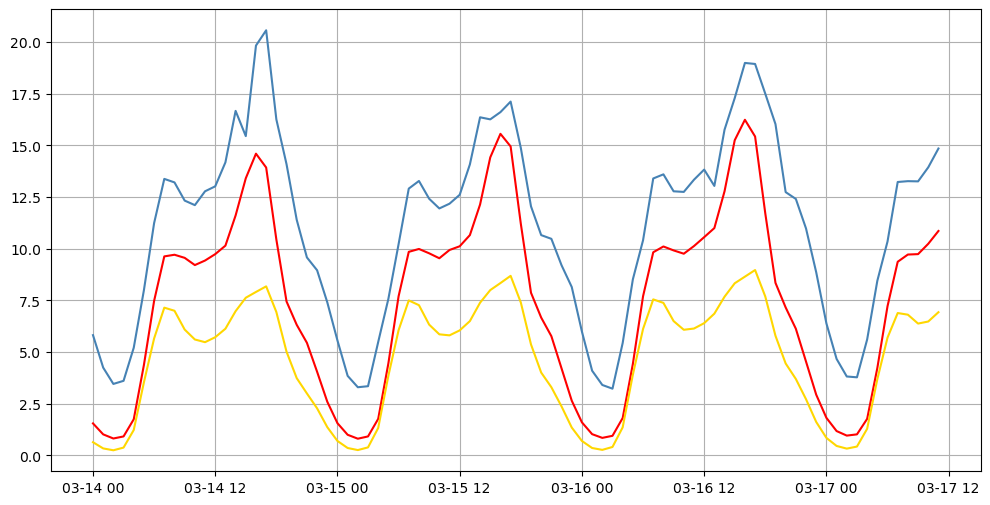

In [6]:
plt.figure(figsize = (12, 6))
plt.plot(data['Hour'], data['1108509-ML'], color = 'red')
plt.plot(data['Hour'], data['716017-ML'], color = 'gold')
plt.plot(data['Hour'], data['1205517-ML'], color = 'steelblue')
plt.grid()
plt.show()

In [1]:
pip install pyts

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 9.0 MB/s eta 0:00:00:00:010:01
Note: you may need to restart the kernel to use updated packages.


In [30]:
from pyts.image import GramianAngularField
import matplotlib.pyplot as plt

#Xtrain, Xtest = get_some_data() # both N x T time series samples
Xtrain = pd.concat([data['1108509-ML'], data['716017-ML'], data['1205517-ML'], data['1125314-ML']], axis = 1)


gaf = GramianAngularField(image_size = 1)
im_train = gaf.fit_transform(Xtrain)
#im_test = gaf.transform(Xtest)

# plot one image
plt.imshow(im_train[0])
plt.show()

ValueError: If 'n_segments' is an integer, it must be greater than or equal to 2 (got 1).

In [26]:
im_train

array([[[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [